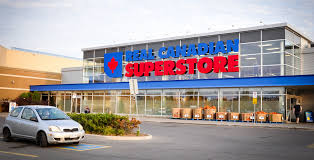

## **Table of Content**


1. INTRODUCTION
>1.1 OVERVIEW<BR>1.2 DATA DESCRIPTION


2. REPOSITORY
>2.1 IMPORT LIBRARIES<BR>2.2 LOAD DATA SET & DATA PREPARATION


3. BUSINESS QUESTIONS
>3.1 WHAT IS THE TOTAL SALES PER PRODUCT CATEGORY?<BR>3.2 WHICH CITIES GENERATE THE MOST REVENUE?<BR>3.3 WHICH CUSTOMERS GENERATE THE MOST REVENUE? <BR> 3.4 WHAT'S THE TREND OF MONTHLY SALES?<BR> 3.5 WHICH STATES BRING THE HIGHEST PROFIT?<BR>3.6 WHICH SEGMENT YIELDS THE HIGHEST AVERAGE PROFIT PER ORDER? <BR> 3.7 WHAT IS THE SHIPPING MODE WITH THE MOST SALES? <BR> 3.8 WHICH SUB-CATEGORIES ARE UNDER PERFORMING (LOW SALES & LOW PROFIT)



4. CONCLUSION

# **1. INTRODUCTION**

## **1.1 OVERVIEW**

In this project, an end-to-end analysis of a retail store's transactional dataset (Superstore dataset) was conducted using SQL, aiming to derive actionable insights that can inform business decisions across sales, customer engagement, and product performance.

The project focuses on transforming raw sales data into meaningful intelligence by answering seven key business questions; ranging from identifying the top-performing product categories and customer segments, to uncovering underperforming areas that require strategic intervention.

By importing and querying the dataset with SQL (SQLite), I was able to calculate total sales, profits, and revenue distributions across categories, customer types, and geographic locations. The [dataset](https://drive.google.com/file/d/16fbqLfK_rS146isduoxyLZCOino_d0e3/view?usp=sharing), sourced from Kaggle, contained over 10,000 rows of transactional data covering multiple dimensions including product details, customer information, order dates, sales, profit, and shipping methods.

This analysis empowers stakeholders to:

* Optimize inventory by understanding demand trends

* Identify and target high-value customer groups

* Reassess investment in unprofitable product lines

* Improve shipping and fulfillment strategies



This project not only demonstrates technical proficiency in SQL for data manipulation and insight generation, but also showcases the ability to think analytically, solve real business problems, and communicate findings effectively.

## **1.2 DATA DESCRIPTION**

The Superstore dataset provides a comprehensive view of a retail store's operations across the United States, including data on sales, profits, customers, products, and shipping.

The dataset contains 9994 rows and 21 columns, capturing information across various business dimensions. The dataset contains the following information

```
Row ID => Unique ID for each row.
Order ID => Unique Order ID for each Customer.
Order Date => Order Date of the product.
Ship Date => Shipping Date of the Product.
Ship Mode=> Shipping Mode specified by the Customer.
Customer ID => Unique ID to identify each Customer.
Customer Name => Name of the Customer.
Segment => The segment where the Customer belongs.
Country => Country of residence of the Customer.
City => City of residence of of the Customer.
State => State of residence of the Customer.
Postal Code => Postal Code of every Customer.
Region => Region where the Customer belong.
Product ID => Unique ID of the Product.
Category => Category of the product ordered.
Sub-Category => Sub-Category of the product ordered.
Product Name => Name of the Product
Sales => Sales of the Product.
Quantity => Quantity of the Product.
Discount => Discount provided.
Profit => Profit/Loss incurred.
```

# **2. REPOSITORY**
## **2.1 IMPORT LIBRARIES**

In [45]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt


## **2.2 LOAD DATA SET & DATA PREPARATION**

In [46]:
# using pd.read to load the dataset
# storing the dataset with the variable name *store*


store = pd.read_csv("Superstore.csv", encoding = "latin1")
store.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [47]:
# Fixing the data type for the date
store["Order Date"] = pd.to_datetime(store["Order Date"]).dt.strftime('%Y-%m-%d')
store["Ship Date"] = pd.to_datetime(store["Ship Date"]).dt.strftime('%Y-%m-%d')



In [48]:
# create sqlite database connection
conn = sqlite3.connect("mydatabase.db")

# load data to sqlite
store.to_sql("store", conn, index = False, if_exists = "replace")

9994

Successfully loaded and connected

# **3. BUSINESS QUESTIONS**
## **3.1 WHAT IS THE TOTAL SALES PER PRODUCT CATEGORY?**

In [49]:
query = """
         SELECT category, ROUND(SUM (Sales), 2) AS Total_Sales
         FROM store
         GROUP BY Category
         ORDER BY Total_Sales DESC;
"""
pd.read_sql_query(query, conn)



,Category,Total_Sales
0,Technology,836154.03
1,Furniture,741999.80
2,Office Supplies,719047.03


## **3.2 WHICH CITIES GENERATE THE MOST REVENUE?**

In [50]:
query = """
        SELECT City, ROUND(SUM(Sales), 2) AS Revenue
        FROM store
        GROUP BY City
        ORDER BY Revenue DESC;
"""
pd.read_sql_query(query, conn)

,City,Revenue
0,New York City,256368.16
1,Los Angeles,175851.34
2,Seattle,119540.74
3,San Francisco,112669.09
4,Philadelphia,109077.01
...,...,...
526,Ormond Beach,2.81
527,Pensacola,2.21
528,Jupiter,2.06
529,Elyria,1.82


## **3.3 WHICH CUSTOMERS GENERATE THE MOST REVENUE?**

In [51]:
query = """
        SELECT [Customer Name], ROUND(SUM(Sales), 2) AS Customer_Revenue
        FROM store
        GROUP BY [Customer Name]
        ORDER BY Customer_Revenue DESC LIMIT 5;
"""
pd.read_sql_query(query, conn)

,Customer Name,Customer_Revenue
0,Sean Miller,25043.05
1,Tamara Chand,19052.22
2,Raymond Buch,15117.34
3,Tom Ashbrook,14595.62
4,Adrian Barton,14473.57


## **3.4 WHAT'S THE TREND OF MONTHLY SALES?**

In [52]:
query = """
        SELECT strftime('%Y-%m', [Order Date]) AS Month,
        ROUND(SUM(Sales), 2) AS Monthly_Sales
        FROM store
        GROUP BY Month
        ORDER BY Month;

"""
pd.read_sql_query(query, conn)

,Month,Monthly_Sales
0,2014-01,14236.90
1,2014-02,4519.89
2,2014-03,55691.01
3,2014-04,28295.35
4,2014-05,23648.29
5,2014-06,34595.13
6,2014-07,33946.39
7,2014-08,27909.47
8,2014-09,81777.35
9,2014-10,31453.39


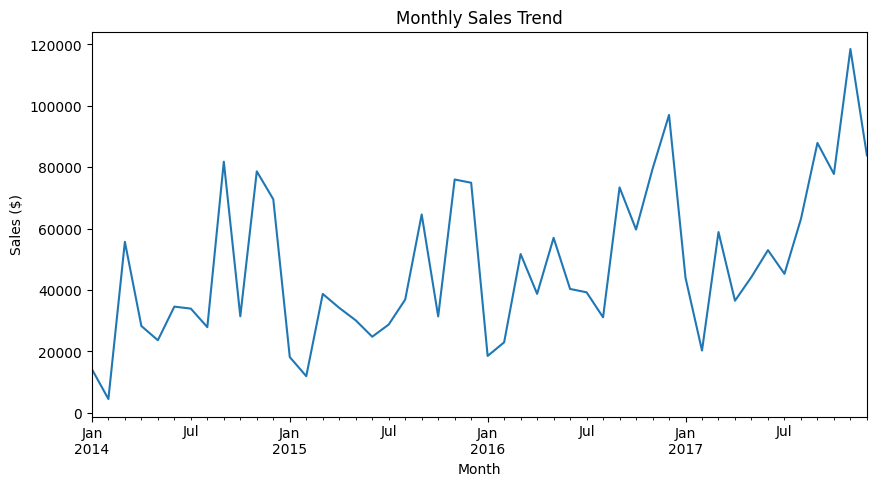

In [53]:
# monthly sales trend visuals
store["Order Date"] = pd.to_datetime(store["Order Date"])
store["Month"] = store["Order Date"].dt.to_period("M")
monthly_sales = store.groupby("Month")["Sales"].sum()

monthly_sales.plot(kind="line", title="Monthly Sales Trend", figsize=(10,5))
plt.ylabel("Sales ($)")
plt.show()

In [54]:
# top 7 months with the highest sales trend
query = """
        SELECT strftime('%Y-%m', [Order Date]) AS Month,
        ROUND(SUM(Sales), 2) AS Monthly_Sales
        FROM store
        GROUP BY Month
        ORDER BY Monthly_Sales DESC LIMIT 7;

"""
pd.read_sql_query(query, conn)

,Month,Monthly_Sales
0,2017-11,118447.83
1,2016-12,96999.04
2,2017-09,87866.65
3,2017-12,83829.32
4,2014-09,81777.35
5,2016-11,79411.97
6,2014-11,78628.72


## **3.5 WHICH STATES BRING THE LARGEST PROFITS?**

In [55]:
# top 10 states
query = """
        SELECT State, ROUND(SUM(Profit), 2) AS Total_profit
        FROM store
        GROUP BY state
        ORDER BY Total_profit DESC
        LIMIT 10;
"""
pd.read_sql_query(query, conn)

,State,Total_profit
0,California,76381.39
1,New York,74038.55
2,Washington,33402.65
3,Michigan,24463.19
4,Virginia,18597.95
5,Indiana,18382.94
6,Georgia,16250.04
7,Kentucky,11199.70
8,Minnesota,10823.19
9,Delaware,9977.37


## **3.6 WHICH SEGMENT YIELDS THE HIGHEST AVERAGE PROFIT PER ORDER?**

In [56]:
store["Segment"].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [57]:
query = """
       SELECT segment, ROUND(AVG(Profit)) AS Avg_profit
       FROM store
       GROUP BY Segment
       ORDER BY Avg_profit DESC
       LIMIT 1;
"""
pd.read_sql_query(query, conn)

,Segment,Avg_profit
0,Home Office,34.0


## **3.7 WHAT IS THE SHIPPING MODE WITH THE MOST SALES?**

In [58]:
store["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [59]:
query = """
       SELECT [Ship Mode], ROUND(SUM(Sales), 2) as Total_sales
       FROM store
       GROUP BY [Ship Mode]
       ORDER BY Total_sales DESC
       LIMIT 1;
"""
pd.read_sql_query(query, conn)

,Ship Mode,Total_sales
0,Standard Class,1358215.74


## **3.8 WHICH SUB-CATEGORIES ARE UNDERPERFORMING?**

In [60]:
store["Sub-Category"].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [61]:
# Total profit by sub-category
query = """
       SELECT [Sub-Category], SUM(Profit) as Total_profit
       FROM store
       GROUP BY [Sub-Category]
       ORDER BY Total_profit DESC;
"""
pd.read_sql_query(query, conn)

,Sub-Category,Total_profit
0,Copiers,55617.8249
1,Phones,44515.7306
2,Accessories,41936.6357
3,Paper,34053.5693
4,Binders,30221.7633
5,Chairs,26590.1663
6,Storage,21278.8264
7,Appliances,18138.0054
8,Furnishings,13059.1436
9,Envelopes,6964.1767


In [62]:
# Total sales by sub-category
query = """
       SELECT [Sub-Category], SUM(Sales) as Total_sales
       FROM store
       GROUP BY [Sub-Category];
"""
pd.read_sql_query(query, conn)

,Sub-Category,Total_sales
0,Accessories,167380.3180
1,Appliances,107532.1610
2,Art,27118.7920
3,Binders,203412.7330
4,Bookcases,114879.9963
5,Chairs,328449.1030
6,Copiers,149528.0300
7,Envelopes,16476.4020
8,Fasteners,3024.2800
9,Furnishings,91705.1640


In [63]:
# average total sales by category
query = """
        WITH Total_sales AS
        (SELECT [Sub-Category] as sub_cat, SUM(Sales) as T_Sales
                 FROM store
                 GROUP BY sub_cat)
        SELECT ROUND(AVG(T_Sales), 2) as Avg_Total
        FROM Total_Sales;
"""
pd.read_sql_query(query, conn)

,Avg_Total
0,135129.46


In [64]:
# underperforming categories
# sales less than average and profit less than or equal to zero
query = """
       SELECT [Sub-Category] as Sub_Cat, ROUND(SUM(Sales)) as Total_sales, ROUND(SUM(Profit)) as Total_profit
       FROM store
       GROUP BY Sub_Cat
       HAVING Total_sales < 135129 AND Total_profit <= 0
       ORDER BY Total_profit, Total_sales;
"""
pd.read_sql_query(query, conn)

,Sub_Cat,Total_sales,Total_profit
0,Bookcases,114880.0,-3473.0
1,Supplies,46674.0,-1189.0


# **4. CONCLUSION**
In this project, a detailed SQL-based data analysis was conducted on the Superstore sales dataset to uncover patterns and provide data-driven insights for business improvement. The dataset, which includes sales transactions across various U.S. regions, customer segments, product categories, and shipping methods, was cleaned, formatted, and loaded into a SQLite database using Python.


The analysis revealed clear trends that can help the business make better decisions regarding pricing, customer targeting, and operational efficiency. The combination of SQL for analysis and Python for visualization provided a robust way to extract insights from raw sales data.

The business performs strongly in certain product segments and regions but is underperforming in others due to either poor margins, excessive discounting, or inefficient shipping strategies.

A total of eight key business questions were addressed to explore:

* Revenue distribution by category and sub-category

* Regional performance

* Profitability of product lines

* City Segmentation

* Customer segmentation

* Shipping performance

* Sales trends over time

* Top-selling and least-performing products

This analysis was performed using SQL queries on the structured data.



### ***KEY FINDINGS***
* **Top Performing Categories & Sub-Categories**

The Technology category had the highest total sales, followed by Furnitures.

Within sub-categories, Copiers, Phones & Accessories were top contributors to revenue.

* **Underperforming Areas**

The Tables sub-category had consistently low profits despite reasonable sales, indicating high costs or poor margins.


* **Seasonality and Time Trends**

Sales peaked during Q4 (October to December), likely due to end-of-year promotions and holidays.

A steady year-over-year growth in total sales was observed.






### ***RECOMMENDATION***
* **Review & Reprice Low-Margin Products**

Particularly in the Tables, Supplies and Bookcases sub-categories.

Evaluate cost structure or discontinue unprofitable SKUs.

* **Enhance Focus on High-Value Customers**

Run targeted marketing campaigns toward Corporate and Home Office segments, which show high profitability.

* **Leverage Seasonality**

Prepare for demand spikes in Q4 with inventory and promotions aligned to past performance.

